In [108]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline

## Q4. There are 7 Garage Features ['GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']. Is there any correlation between those features? and if there is, can any of them be removed?

In [109]:
df = pd.read_csv(
    './../DataFiles/house-prices-advanced-regression-techniques/train.csv')

In [110]:
# Impute null values in LotFrontage column with the mean
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

# Replace null values in Alley column with a new category "No alley access"
df["Alley"].fillna("No alley access", inplace=True)

# Impute null values in MasVnrType and MasVnrArea columns with the mode and median respectively
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

# Replace null values in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, and BsmtFinType2 columns with a new category "No basement"
basement_cols = ["BsmtQual", "BsmtCond",
                 "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in basement_cols:
    df[col].fillna("No basement", inplace=True)

# Impute null value in Electrical column with the mode
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

# Replace null values in FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond columns with a new category "No fireplace" or "No garage"
fireplace_cols = ["FireplaceQu"]
garage_cols = ["GarageType", "GarageYrBlt",
               "GarageFinish", "GarageQual", "GarageCond"]
for col in fireplace_cols:
    df[col].fillna("No fireplace", inplace=True)
for col in garage_cols:
    df[col].fillna("No garage", inplace=True)

# Replace null values in PoolQC, Fence, and MiscFeature columns with a new category "No pool", "No fence", or "No miscellaneous feature"
df["PoolQC"].fillna("No pool", inplace=True)
df["Fence"].fillna("No fence", inplace=True)
df["MiscFeature"].fillna("No miscellaneous feature", inplace=True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,No miscellaneous feature,0,12,2008,WD,Normal,250000


In [111]:
df.GarageType.value_counts()

GarageType
Attchd       870
Detchd       387
BuiltIn       88
No garage     81
Basment       19
CarPort        9
2Types         6
Name: count, dtype: int64

In [112]:
# Replace "No garage" with -1
df['GarageYrBlt'] = df['GarageYrBlt'].replace("No garage", -1)

# Convert the column to a numerical type
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'])

In [113]:
df.GarageYrBlt.value_counts()

GarageYrBlt
-1.0       81
 2005.0    65
 2006.0    59
 2004.0    53
 2003.0    50
           ..
 1927.0     1
 1900.0     1
 1906.0     1
 1908.0     1
 1933.0     1
Name: count, Length: 98, dtype: int64

In [114]:
corr_matrix = df[['GarageYrBlt', 'SalePrice']].corr()
print(corr_matrix)

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.261354
SalePrice       0.261354   1.000000


In [115]:
# Low Corr: drop the column
df.drop('GarageYrBlt', axis=1, inplace=True)

In [116]:
# Define a dictionary to map string values to numerical values
garage_type_map = {'Attchd': 1, 'Detchd': 2, 'BuiltIn': 3,
                   'No garage': 0, 'Basment': 4, 'CarPort': 5, '2Types': 6}

# Replace string values with numerical values using the map
df['GarageTypeNum'] = df['GarageType'].replace(garage_type_map)

In [117]:
df.GarageFinish.value_counts()

GarageFinish
Unf          605
RFn          422
Fin          352
No garage     81
Name: count, dtype: int64

In [118]:
# create a mapping dictionary for the values in GarageFinish
garage_finish_map = {'No garage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

# create a new column GarageFinishNum based on the mapping dictionary
df['GarageFinishNum'] = df['GarageFinish'].map(garage_finish_map)

In [119]:
df.GarageQual.value_counts()

GarageQual
TA           1311
No garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: count, dtype: int64

In [120]:
garage_qual_dict = {'No garage': 0, 'Po': 1,
                    'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['GarageQualNum'] = df['GarageQual'].map(garage_qual_dict).fillna(0)

In [121]:
garage_cond_dict = {'No garage': 0, 'Po': 1,
                    'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['GarageCondNum'] = df['GarageCond'].map(garage_cond_dict).fillna(0)

<Axes: >

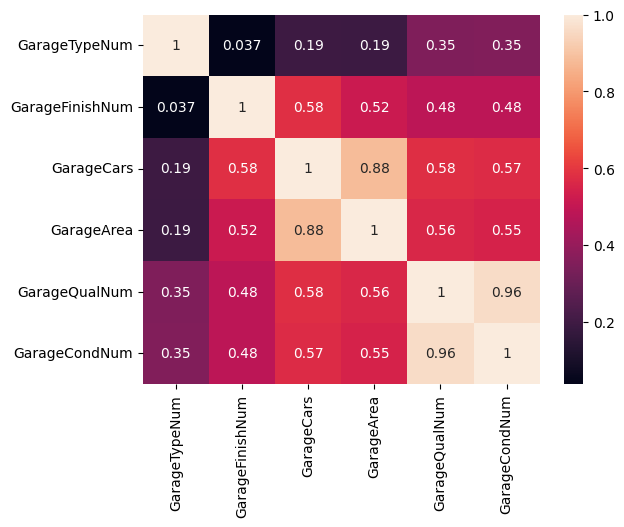

In [122]:
garage_features = ['GarageTypeNum',  'GarageFinishNum',
                   'GarageCars', 'GarageArea', 'GarageQualNum', 'GarageCondNum']
garage_df = df[garage_features]
garage_corr = garage_df.corr()
sns.heatmap(garage_corr, annot=True)


<Axes: >

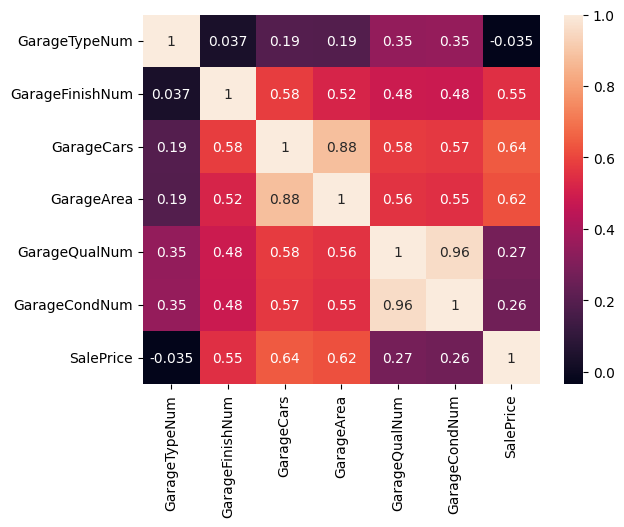

In [123]:
corr_sale = df[['GarageTypeNum',  'GarageFinishNum',
                'GarageCars', 'GarageArea', 'GarageQualNum', 'GarageCondNum', 'SalePrice']].corr()
sns.heatmap(corr_sale, annot=True)

Answer:
------------
From the Garage Columns There was [GarageArea, GarageCars] has large correlation so GarageArea is removed, also GarageType has very low correlation with all Garage Features and SalesPrice so it is dropped also, and the GarageYrBlt has very small corr with SalesPrice also.